IMPORTING LIBRARIES

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
customer = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
customer

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [39]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [40]:
customer.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

DATA CLEANING

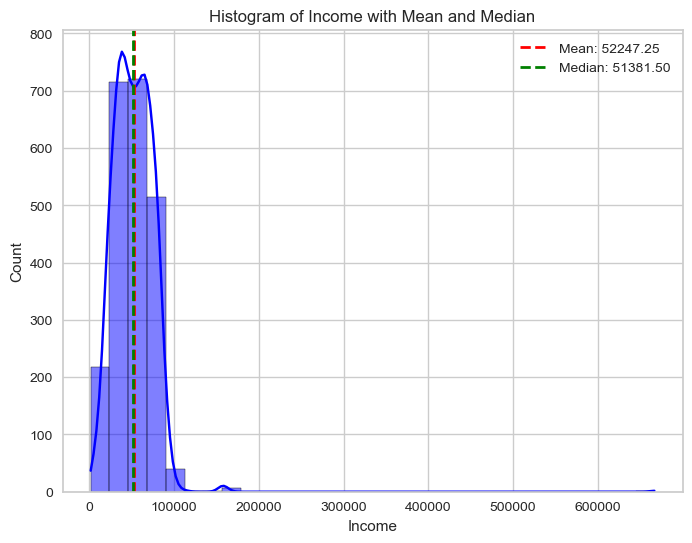

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for 'person_emp_length'
plt.figure(figsize=(8, 6))
sns.histplot(customer['Income'], bins=30, kde=True, color='blue')

# Add a vertical line for the mean
mean_value = customer['Income'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Add a vertical line for the median
median_value = customer['Income'].median()
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

plt.title('Histogram of Income with Mean and Median')
plt.legend()
plt.show()

In [4]:
# filing using the median
customer['Income'].fillna(customer['Income'].median(), inplace=True)

In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
customer['Dt_Customer'].nunique()

663

In [7]:
# Convert "Dt_Customer" column to datetime format with the correct format specified
customer["Dt_Customer"] = pd.to_datetime(customer["Dt_Customer"], format='%d-%m-%Y')

# Find the newest and oldest customer enrollment dates
newest_date = customer["Dt_Customer"].max().date()
oldest_date = customer["Dt_Customer"].min().date()

print("The newest customer's enrolment date in the records:", newest_date)
print("The oldest customer's enrolment date in the records:", oldest_date)


The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [8]:
newest_enrollment_date = customer["Dt_Customer"].max()  # Find the newest enrollment date
customer["Customer_tenure"] = (newest_enrollment_date - customer["Dt_Customer"]).dt.days  # Calculate delta in days


In [9]:
customer

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_tenure
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,381
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,19
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,155
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,156


In [10]:
# Iterate over each column in the DataFrame
for column in customer.columns: 
    if customer[column].dtype == 'object':
        print(f"Unique values in {column}: {customer[column].value_counts()}")


Unique values in Education: Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Unique values in Marital_Status: Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


FEATURE ENGINEERING

In [11]:
# Calculate Age of Customer Today
customer["Age"] = 2024 - customer["Year_Birth"]

#Total spendings on various items
customer["Spent"] = customer["MntWines"]+ customer["MntFruits"] + customer["MntMeatProducts"] + customer["MntFishProducts"] + customer["MntSweetProducts"]+ customer["MntGoldProds"]
# Derive Living Situation by Marital Status
customer["Living_Situation"] = customer["Marital_Status"].replace({"Married": "With Partner", "Together": "With Partner",
                                                           "Absurd": "Alone", "Widow": "Alone", "YOLO": "Alone",
                                                           "Divorced": "Alone", "Single": "Alone"})

# Feature for Total Children in Household
customer["Total_Children"] = customer["Kidhome"] + customer["Teenhome"]

# Calculate Family Size
customer["Family_Size"] = customer["Living_Situation"].map({"Alone": 1, "With Partner": 2}) + customer["Total_Children"]

# Feature for Parenthood Status
customer["Is_Parent"] = (customer["Total_Children"] > 0).astype(int)

# Simplify Education Levels
customer["Education_Level"] = customer["Education"].replace({"Basic": "Undergraduate", "2n Cycle": "Undergraduate",
                                                     "Graduation": "Graduate", "Master": "Postgraduate",
                                                     "PhD": "Postgraduate"})

# Rename Columns for Clarity
customer.rename(columns={"MntWines": "Wine_Spending", "MntFruits": "Fruit_Spending", "MntMeatProducts": "Meat_Spending",
                     "MntFishProducts": "Fish_Spending", "MntSweetProducts": "Sweet_Spending",
                     "MntGoldProds": "Gold_Spending"}, inplace=True)

# Drop Redundant Features
columns_to_drop = ["Marital_Status", "Year_Birth", "Kidhome", "Teenhome", "Education"]
customer.drop(columns=columns_to_drop, inplace=True)


In [12]:
to_drop = ["Dt_Customer", "Z_CostContact", "Z_Revenue", "ID"]
customer = customer.drop(to_drop, axis=1)

In [13]:
customer.describe()

,Income,Recency,Wine_Spending,Fruit_Spending,Meat_Spending,Fish_Spending,Sweet_Spending,Gold_Spending,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_tenure,Age,Spent,Total_Children,Family_Size,Is_Parent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.975446,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,...,0.064286,0.013393,0.009375,0.149107,353.582143,55.194196,605.798214,0.950446,2.595089,0.715179
std,25037.955891,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,...,0.245316,0.114976,0.096391,0.356274,202.122512,11.984069,602.249288,0.751803,0.906959,0.451430
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,180.750000,47.000000,68.750000,0.000000,2.000000,0.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,355.500000,54.000000,396.000000,1.000000,3.000000,1.000000
75%,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,529.000000,65.000000,1045.500000,1.000000,3.000000,1.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,...,1.000000,1.000000,1.000000,1.000000,699.000000,131.000000,2525.000000,3.000000,5.000000,1.000000


In [ ]:
# Set background and palette
sns.set(rc={"axes.facecolor": "#E0FFFF", "figure.facecolor": "#E0FFFF"})
custom_palette = ["#FF6347", "#32CD32", "#4169E1", "#FFD700", "#FF69B4", "#00FFFF"]
sns.set_palette(custom_palette)

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

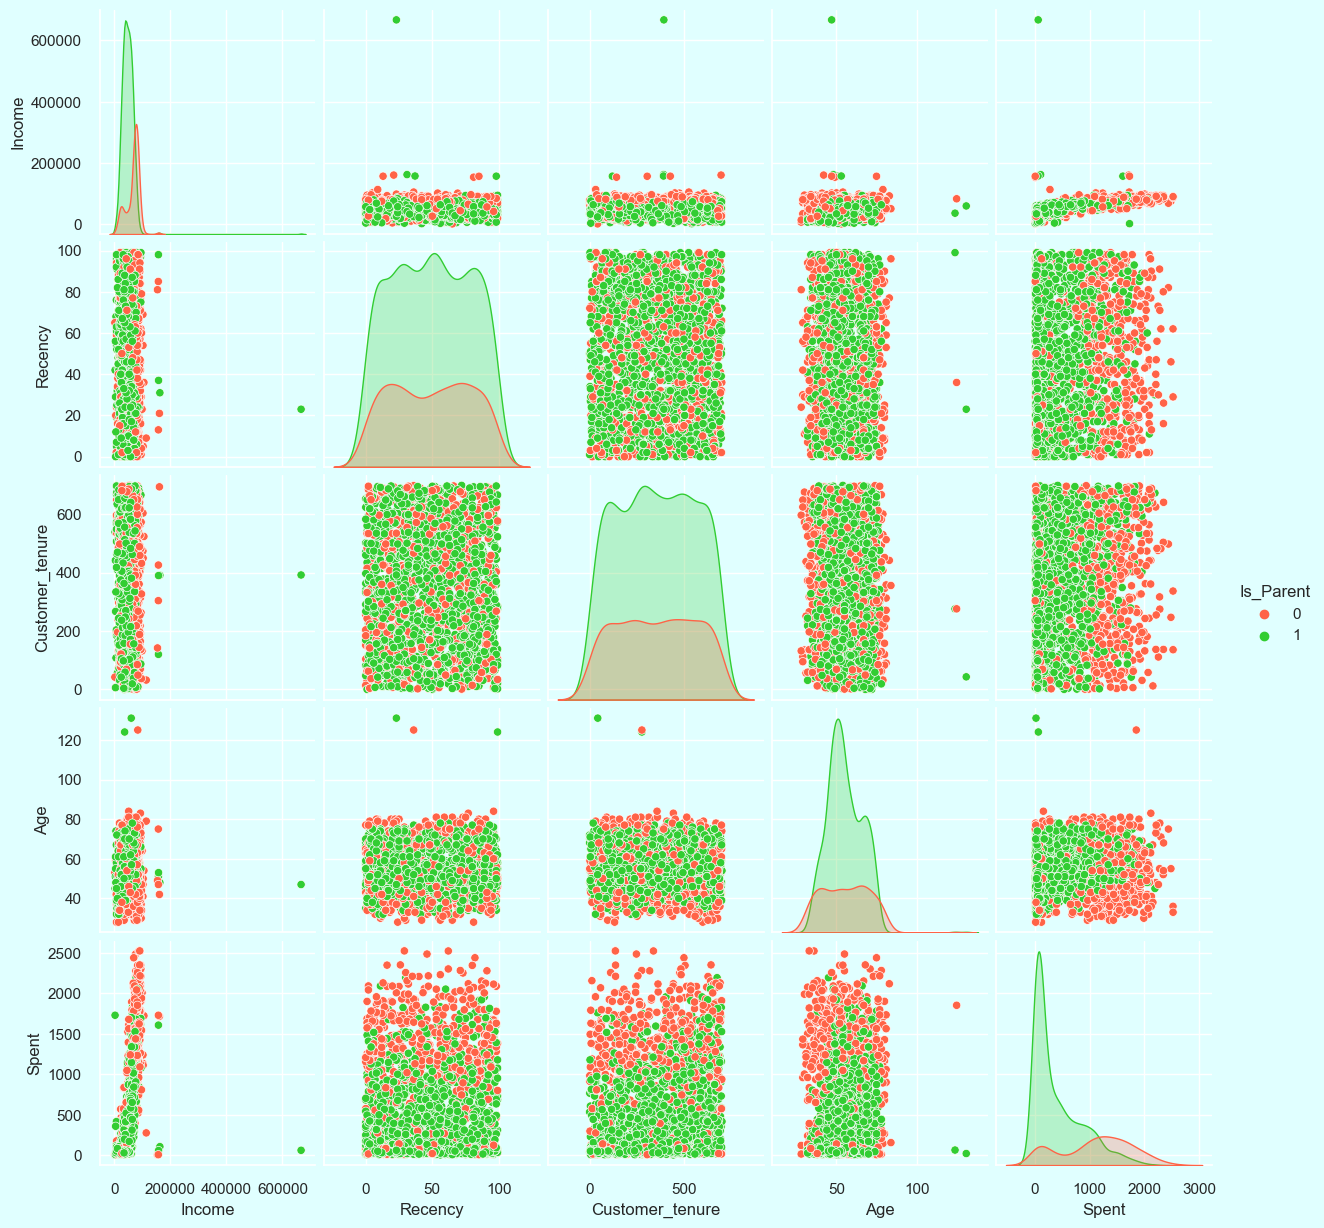

In [14]:

cmap = colors.ListedColormap(["#FF6347", "#32CD32", "#4169E1", "#FFD700", "#FF69B4", "#00FFFF"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_tenure", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(customer[To_Plot], hue= "Is_Parent",palette= (["#FF6347", "#32CD32"]))
#Taking hue 
plt.show()

In [15]:
#Dropping the outliers by setting a cap on Age and income. 
customer = customer[(customer["Age"]<90)]
customer = customer[(customer["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(customer))

The total number of data-points after removing the outliers are: 2236


In [16]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2236 non-null   float64
 1   Recency              2236 non-null   int64  
 2   Wine_Spending        2236 non-null   int64  
 3   Fruit_Spending       2236 non-null   int64  
 4   Meat_Spending        2236 non-null   int64  
 5   Fish_Spending        2236 non-null   int64  
 6   Sweet_Spending       2236 non-null   int64  
 7   Gold_Spending        2236 non-null   int64  
 8   NumDealsPurchases    2236 non-null   int64  
 9   NumWebPurchases      2236 non-null   int64  
 10  NumCatalogPurchases  2236 non-null   int64  
 11  NumStorePurchases    2236 non-null   int64  
 12  NumWebVisitsMonth    2236 non-null   int64  
 13  AcceptedCmp3         2236 non-null   int64  
 14  AcceptedCmp4         2236 non-null   int64  
 15  AcceptedCmp5         2236 non-null   int64 

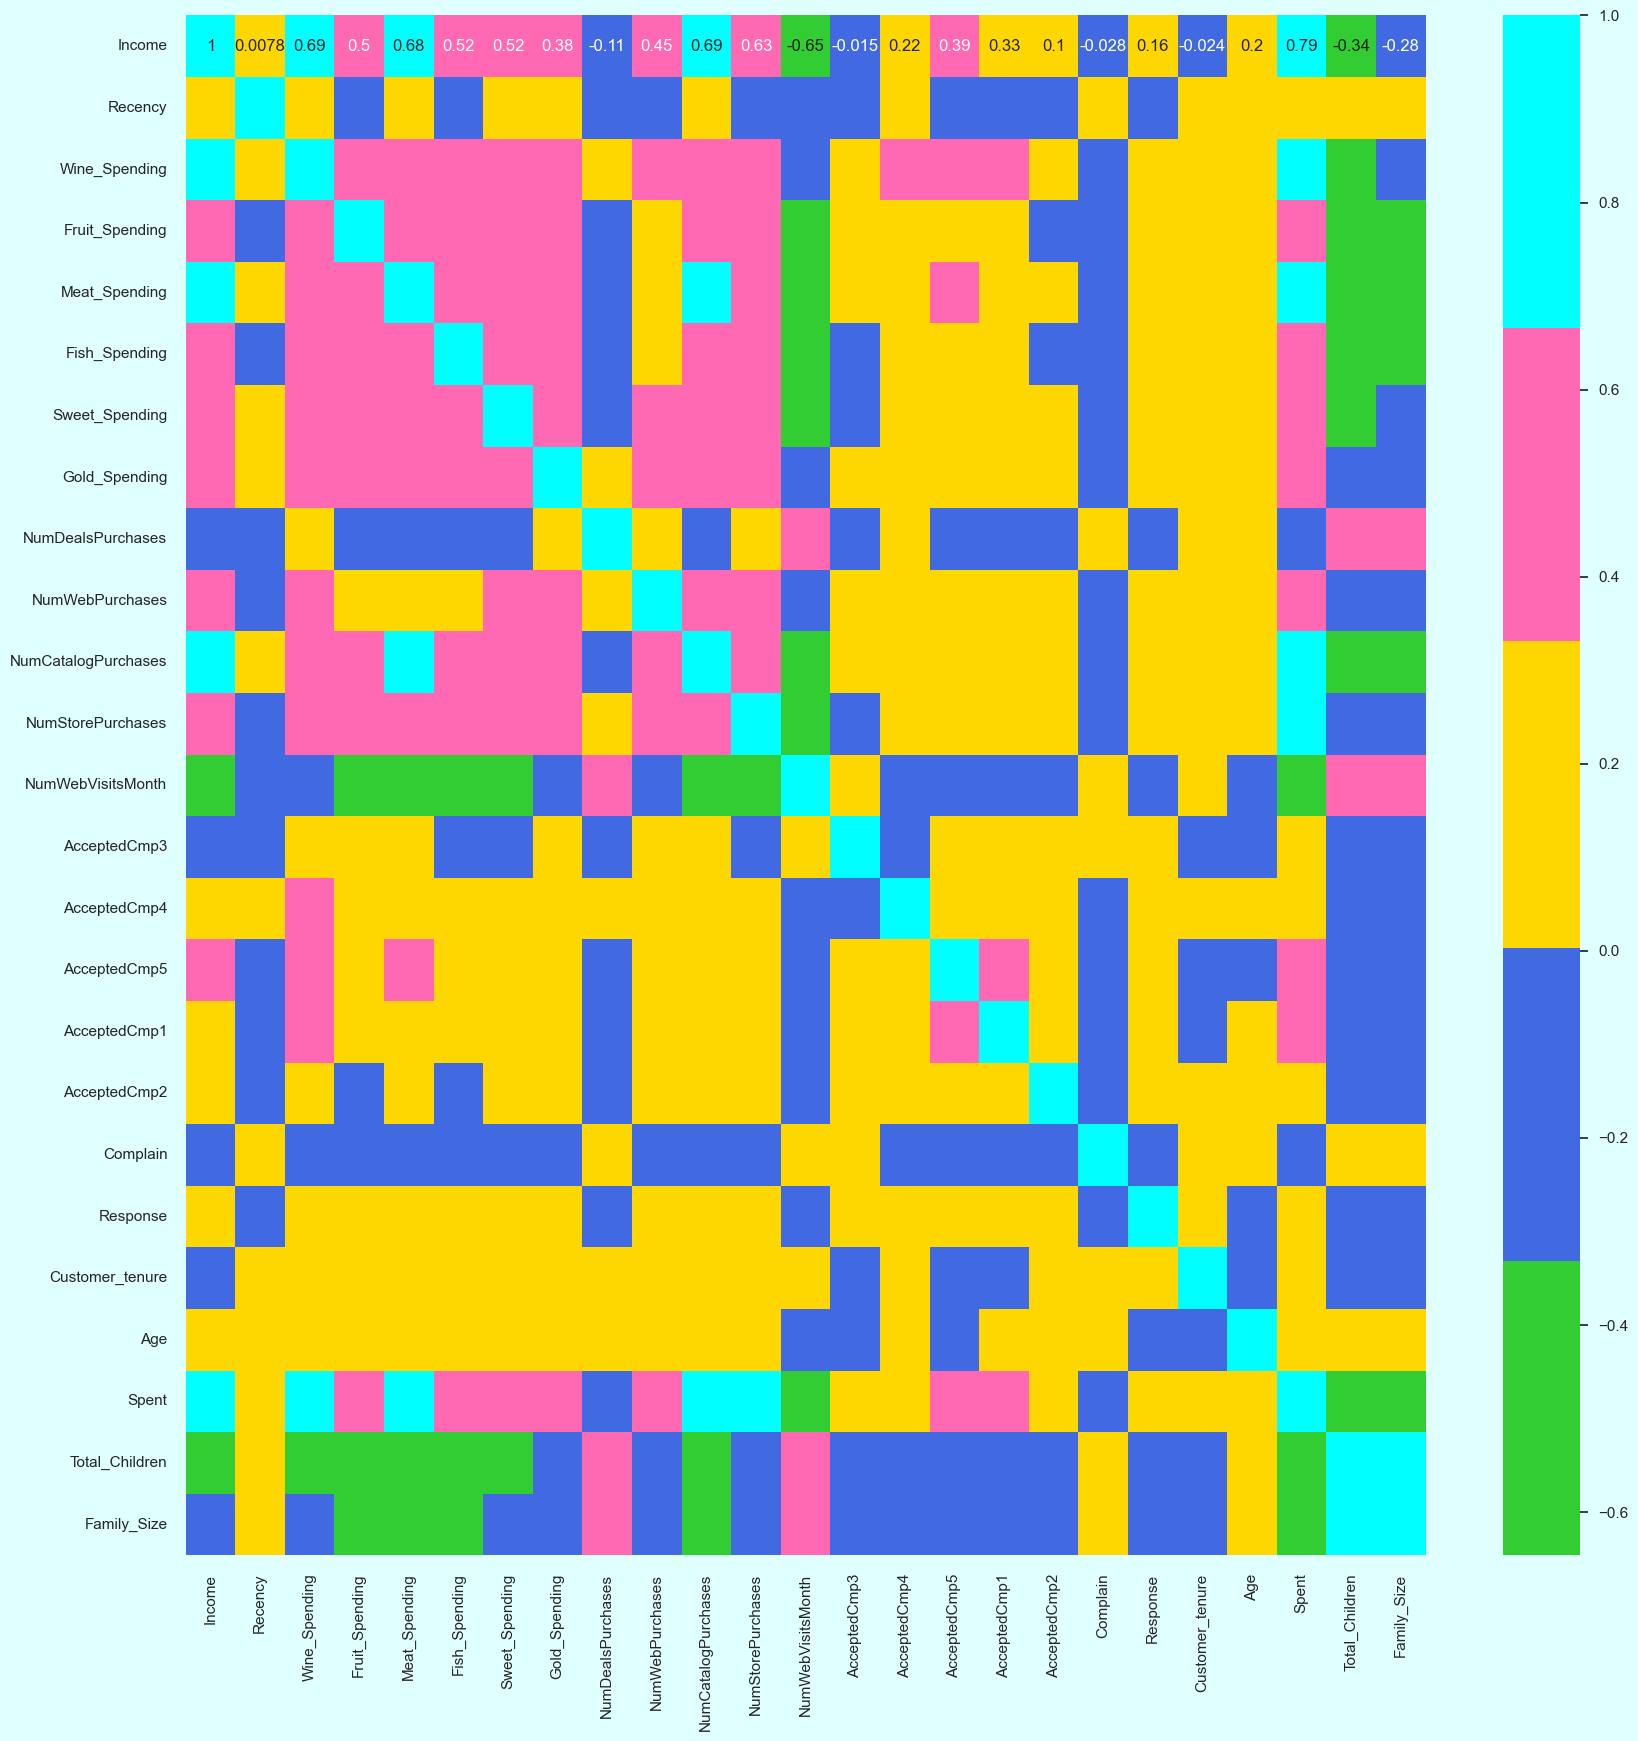

In [17]:
# Drop non-numeric columns before computing the correlation matrix
numeric_columns = customer.select_dtypes(include=['int64', 'float64']).columns
corrmat = customer[numeric_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)
plt.show()


DATA PREPROCESSING

In [18]:
#Get list of categorical variables
s = (customer.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Living_Situation', 'Education_Level']


In [19]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    customer[i]=customer[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [20]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2236 non-null   float64
 1   Recency              2236 non-null   int64  
 2   Wine_Spending        2236 non-null   int64  
 3   Fruit_Spending       2236 non-null   int64  
 4   Meat_Spending        2236 non-null   int64  
 5   Fish_Spending        2236 non-null   int64  
 6   Sweet_Spending       2236 non-null   int64  
 7   Gold_Spending        2236 non-null   int64  
 8   NumDealsPurchases    2236 non-null   int64  
 9   NumWebPurchases      2236 non-null   int64  
 10  NumCatalogPurchases  2236 non-null   int64  
 11  NumStorePurchases    2236 non-null   int64  
 12  NumWebVisitsMonth    2236 non-null   int64  
 13  AcceptedCmp3         2236 non-null   int64  
 14  AcceptedCmp4         2236 non-null   int64  
 15  AcceptedCmp5         2236 non-null   int64 

In [21]:
#Creating a copy of data
ds = customer.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [22]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Income,Recency,Wine_Spending,Fruit_Spending,Meat_Spending,Fish_Spending,Sweet_Spending,Gold_Spending,NumDealsPurchases,NumWebPurchases,...,NumStorePurchases,NumWebVisitsMonth,Customer_tenure,Age,Spent,Living_Situation,Total_Children,Family_Size,Is_Parent,Education_Level
0,0.288947,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.348738,1.407639,...,-0.552429,0.692865,1.529793,1.016868,1.680176,-1.347635,-1.264308,-1.758810,-1.584362,-0.89438
1,-0.262003,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.168700,-1.110921,...,-1.167738,-0.131421,-1.191143,1.273264,-0.962202,-1.347635,1.395139,0.445618,0.631169,-0.89438
2,0.918423,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.686137,1.407639,...,1.293496,-0.543564,-0.206659,0.333146,0.282541,0.742041,-1.264308,-0.656596,-1.584362,-0.89438
3,-1.182183,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.168700,-0.751127,...,-0.552429,0.280722,-1.062517,-1.290693,-0.918994,0.742041,0.065416,0.445618,0.631169,-0.89438
4,0.296187,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,1.383614,0.328256,...,0.062879,-0.131421,-0.953679,-1.034298,-0.305762,0.742041,0.065416,0.445618,0.631169,0.57070


In [23]:
scaled_ds.shape

(2236, 21)

DIMENSIONALITY REDUCTION

In [24]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,1.334651e-16,2.776602,-5.764762,-2.444661,-0.876613,2.293159,7.458849
col2,2236.0,1.271096e-17,1.551959,-4.152098,-1.062151,-0.171313,1.025455,6.034123
col3,2236.0,2.224418e-17,1.209545,-3.748240,-0.863985,-0.056389,0.830951,6.357107


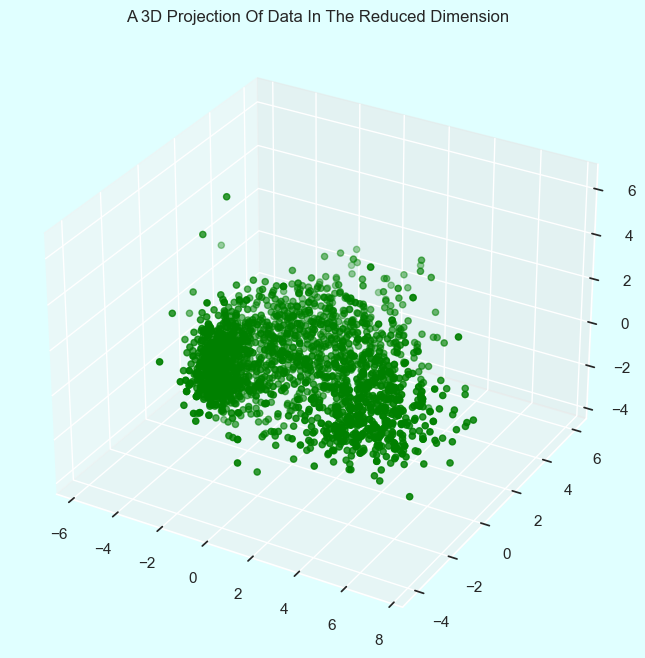

In [26]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="green", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


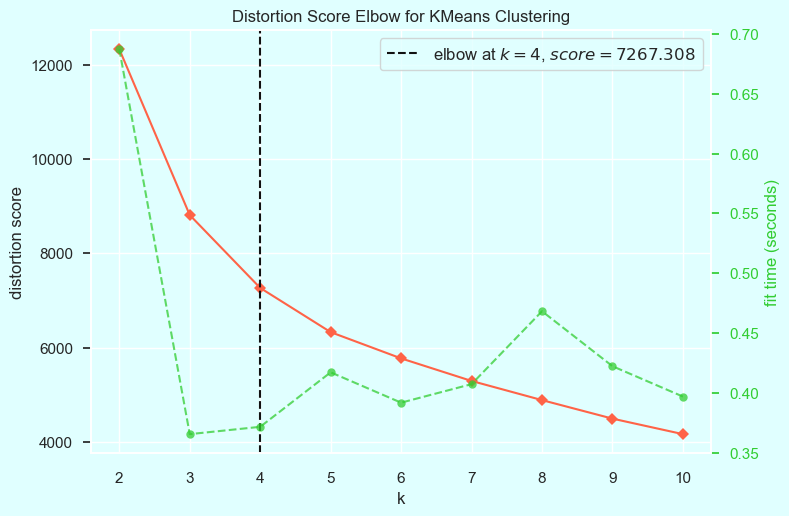

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [29]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
customer["Clusters"]= yhat_AC

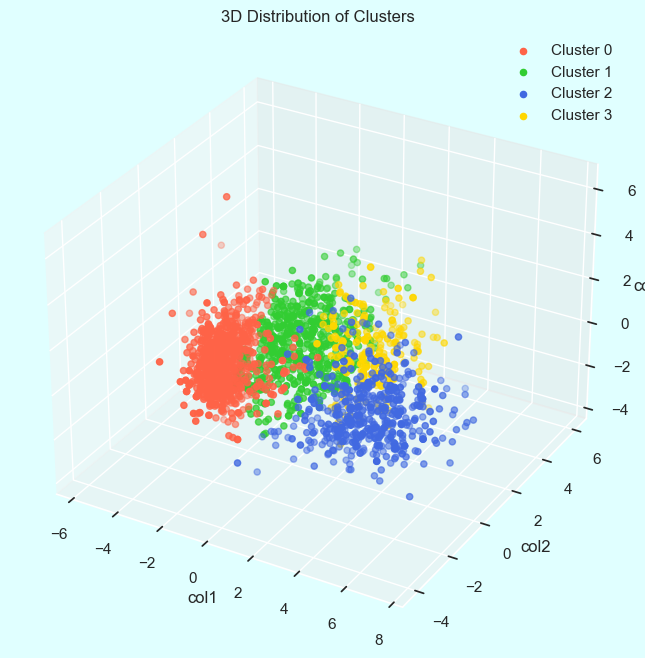

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extracting components
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]
clusters = PCA_ds["Clusters"]

# Create a figure and a 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot for each cluster
for cluster_label in range(4):  # for 4 clusters
    ax.scatter(x[clusters == cluster_label], y[clusters == cluster_label], z[clusters == cluster_label], label=f'Cluster {cluster_label}')

# Set labels and title
ax.set_xlabel("col1")
ax.set_ylabel("col2")
ax.set_zlabel("col3")
ax.set_title("3D Distribution of Clusters")

# Add legend
ax.legend()

# Show plot
plt.show()


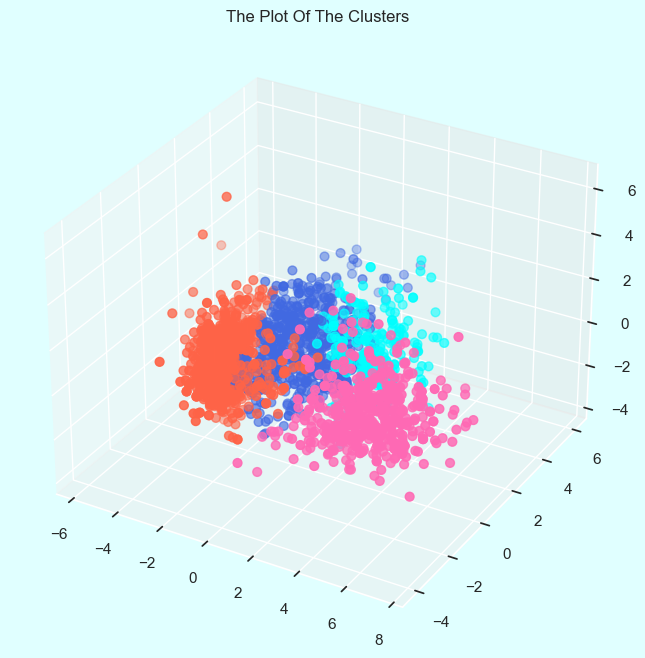

In [31]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

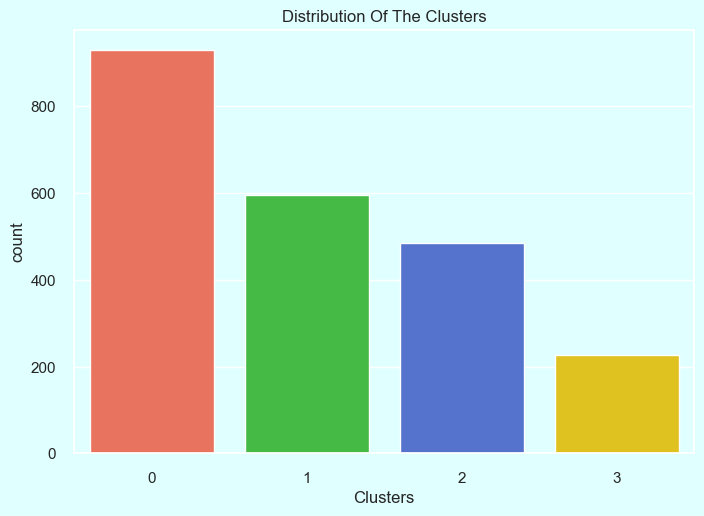

In [35]:
#Plotting countplot of clusters
pal = ["#FF6347", "#32CD32", "#4169E1", "#FFD700"]
pl = sns.countplot(x=customer["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

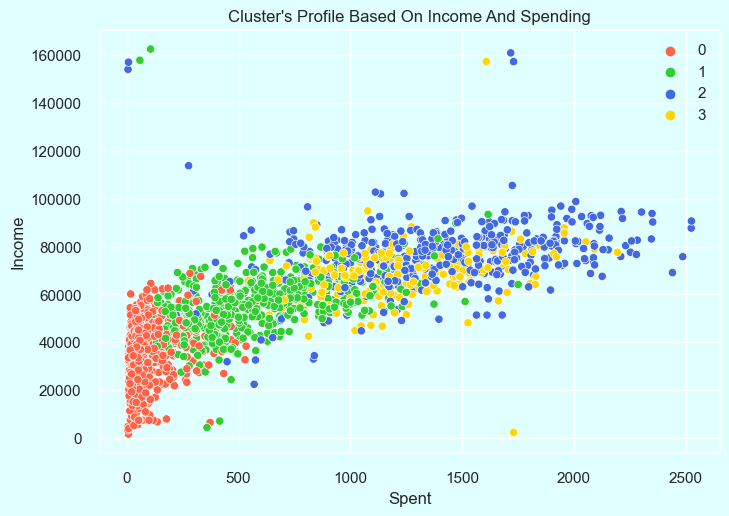

In [38]:
pl = sns.scatterplot(data = customer,x=customer["Spent"], y=customer["Income"],hue=customer["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [48]:
# Define custom palette
pal =["#FF6347", "#32CD32", "#4169E1", "#FFD700"]

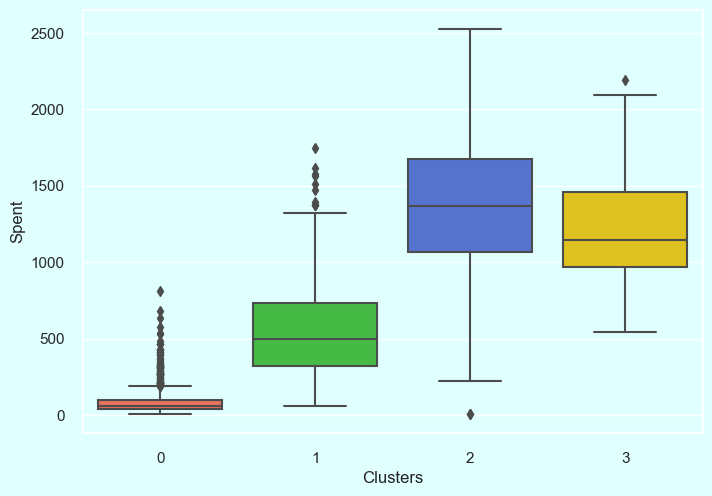

In [49]:
plt.figure()
#pl=sns.swarmplot(x=customer["Clusters"], y=customer["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxplot(x=customer["Clusters"], y=customer["Spent"], palette=pal)
plt.show()

PROFILING

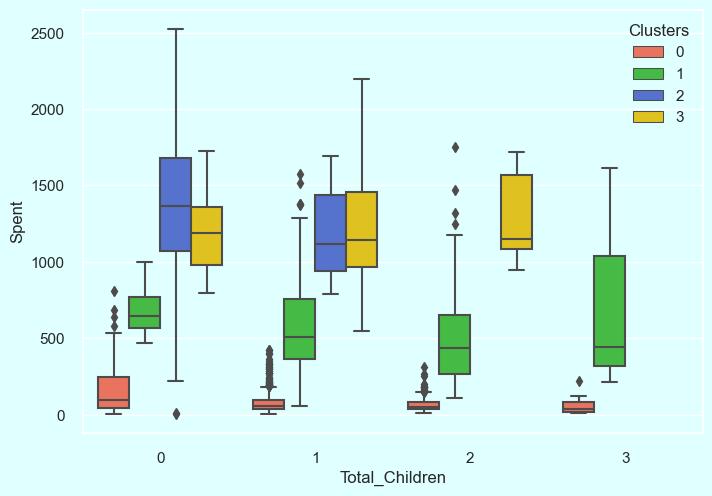

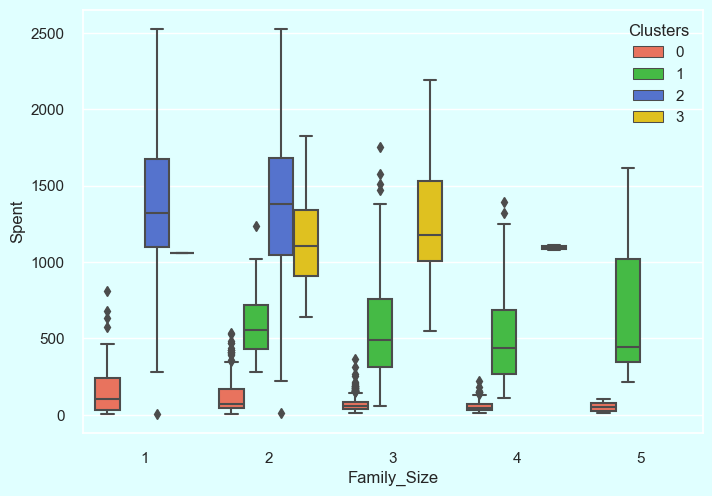

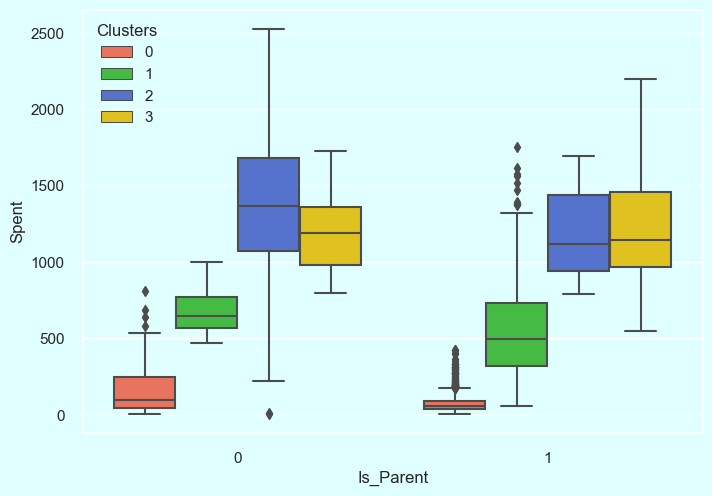

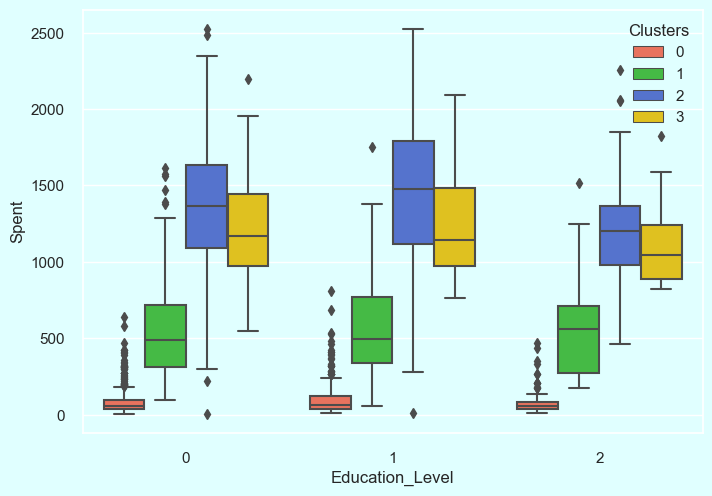

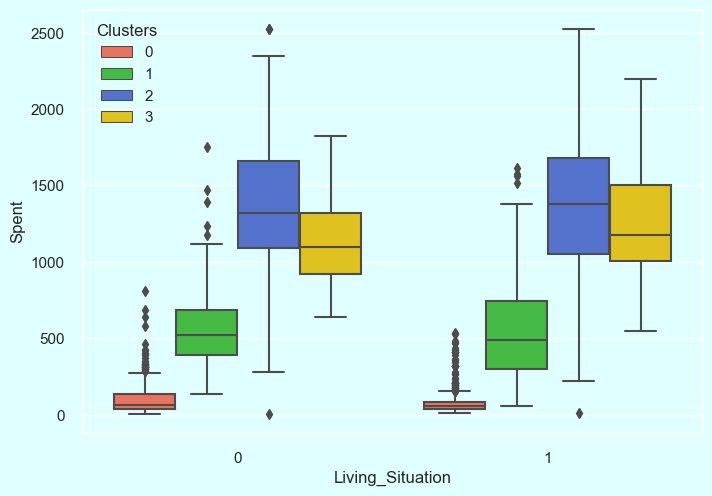

In [59]:
#For Categorical variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))


Personal = [ "Total_Children", "Family_Size", "Is_Parent", "Education_Level","Living_Situation"]

for i in Personal:
    plt.figure()
    sns.boxplot(x=customer[i], y=customer["Spent"], hue =customer["Clusters"], palette=pal)
    plt.show()

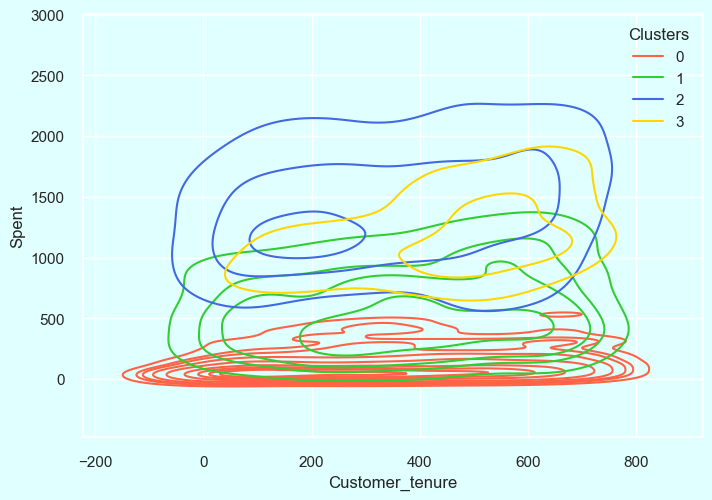

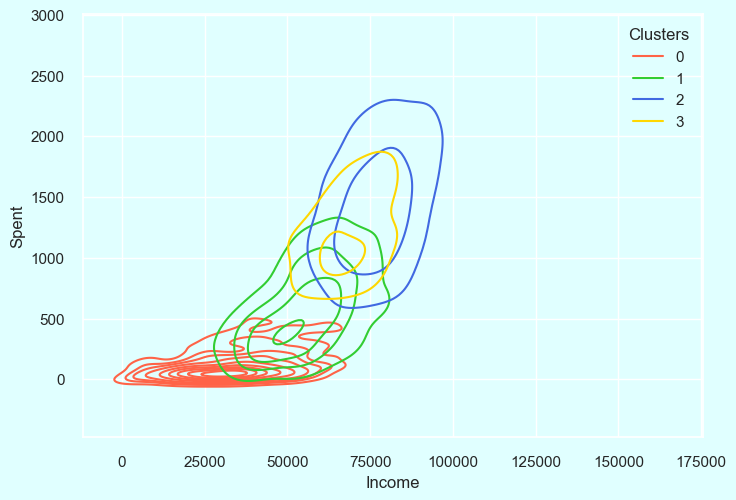

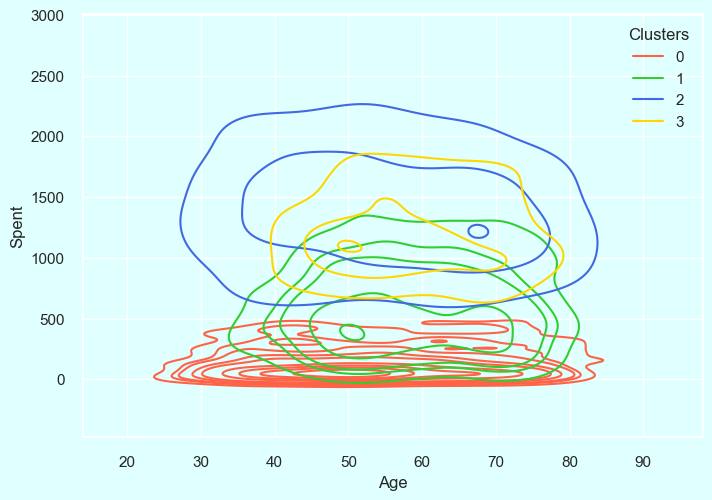

In [61]:
#For Numerical variables

Personal = [ "Customer_tenure", "Income", "Age"]

for i in Personal:
    plt.figure()
    sns.kdeplot(x=customer[i], y=customer["Spent"], hue =customer["Clusters"], kind="kde", palette=pal)
    plt.show()